<font size="9">SchedTune (TaskOnly) on JUNO</font><br>
<hr>

In [1]:
import logging
from conf import LisaLogging
LisaLogging.setup()

In [2]:
# Generate plots inline
%matplotlib inline

import json
import os

# Support for trace events analysis
from trace import Trace

# Support for performance analysis of RTApp workloads
from perf_analysis import PerfAnalysis

# Suport for FTrace events parsing and visualization
import trappy

Populating the interactive namespace from numpy and matplotlib


# Test setup

In [3]:
# Base folder where tests folder are located
res_dir = '../../results_ipynb/stune_juno_taskonly_rampL'
logging.info('Content of the output folder %s', res_dir)
!tree {res_dir}

02:06:31  INFO    : Content of the output folder ../../results_ipynb/stune_juno_taskonly_rampL


../../results_ipynb/stune_juno_taskonly_rampL
├── rtapp:boost15:mixprof
│   ├── 1
│   │   ├── cluster_freqs.png
│   │   ├── cpus_bigs.png
│   │   ├── cpus_littles.png
│   │   ├── energy.json
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_r5_10-60-0.log
│   │   ├── task_perf_task_r5_10-60.png
│   │   ├── task_util_task_r5_10-60.png
│   │   ├── trace.dat
│   │   ├── trace.raw.txt
│   │   └── trace.txt
│   └── platform.json
├── rtapp:boost30:mixprof
│   ├── 1
│   │   ├── cluster_freqs.png
│   │   ├── cpus_bigs.png
│   │   ├── cpus_littles.png
│   │   ├── energy.json
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_r5_10-60-0.log
│   │   ├── task_perf_task_r5_10-60.png
│   │   ├── task_util_task_r5_10-60.png
│   │   ├── trace.dat
│   │   ├── trace.raw.txt
│   │   └── trace.txt
│   └── platform.json
└── rtapp:noboost:mixprof
    ├── 1
    │   ├── cluster_freqs.png
    │   ├── cpus_bigs.png
    │   ├── cpus_littles.png
    │   ├── energy.

# Configuration

In [4]:
# Full analysis function
def analysis(test_id, t_min=None, t_max=None):
    
    test_dir = '{}/rtapp:{}:mixprof'.format(res_dir, test_id)
    run_dir = '{}/1/'.format(test_dir)
    platform_json = '{}/platform.json'.format(test_dir)
    trace_file = '{}/trace.dat'.format(run_dir)
    
    # Load platform description data
    with open(platform_json, 'r') as fh:
        platform = json.load(fh)

    # Load RTApp Performance data
    pa = PerfAnalysis(run_dir)
    logging.info("Loaded performance data for tasks: %s", pa.tasks())
    
    # Load Trace data
    events = [
        "sched_switch",
        "sched_contrib_scale_f",
        "sched_load_avg_cpu",
        "sched_load_avg_task",
        "sched_tune_tasks_update",
        "sched_boost_cpu",
        "sched_boost_task",
        "sched_energy_diff",
        "cpu_frequency",
        "cpu_capacity"
    ]
    trace = Trace(run_dir, events, platform)
    
    # Define time ranges for all the temporal plots
    trace.setXTimeRange(t_min, t_max)
    
    # Tasks plots
    trace.analysis.tasks.plotTasks(pa.tasks())
    for task in pa.tasks():
        pa.plotPerf(task)

    # Cluster plots
    trace.analysis.frequency.plotClusterFrequencies()


# Results

## No Boosting

02:06:32  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
02:06:32  INFO    :   task    task_r5_10-60 found, pid: [1873]
02:06:32  INFO    : Collected events spans a 15.874 [s] time interval
02:06:32  INFO    : Set plots time range to (0.000000, 15.874124)[s]
02:06:32  INFO    : Set plots time range to (0.000000, 15.874124)[s]
02:06:32  INFO    :   task    task_r5_10-60 found, pid: [1873]
02:06:33  INFO    : PerfIndex, Task [task_r5_10-60] avg: 0.65, std: 0.17
02:06:34  INFO    : LITTLE cluster average frequency: 0.530 GHz
02:06:34  INFO    : big    cluster average frequency: 0.450 GHz


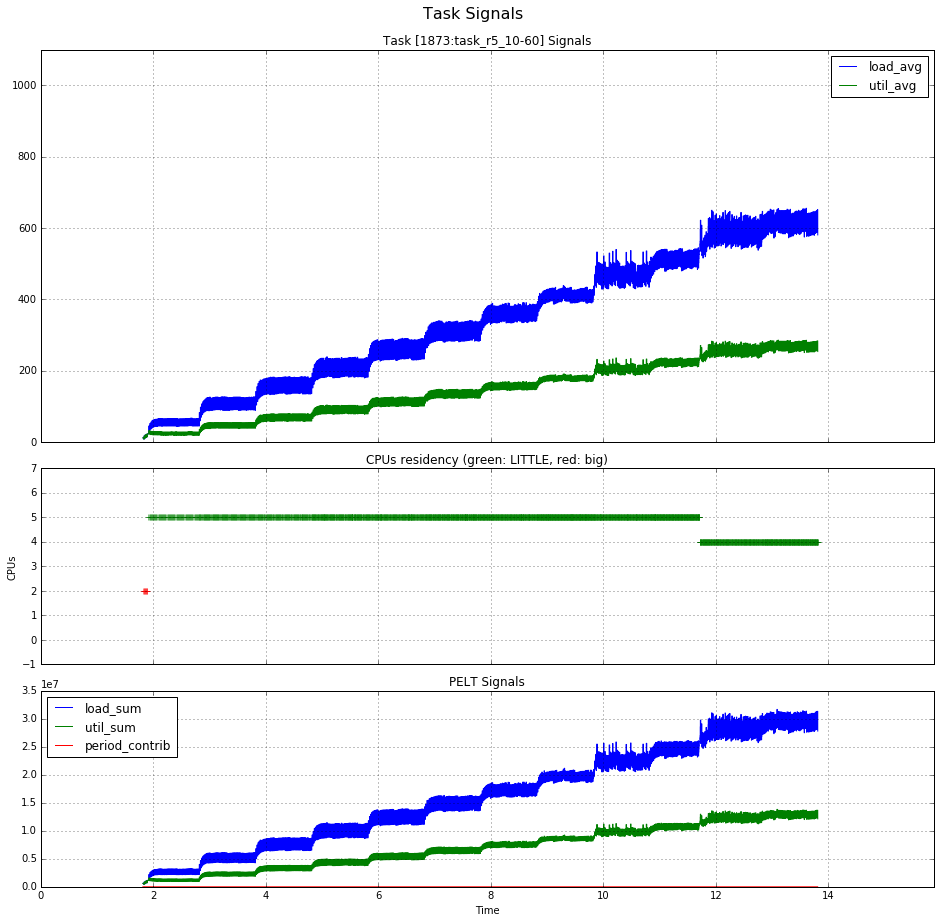

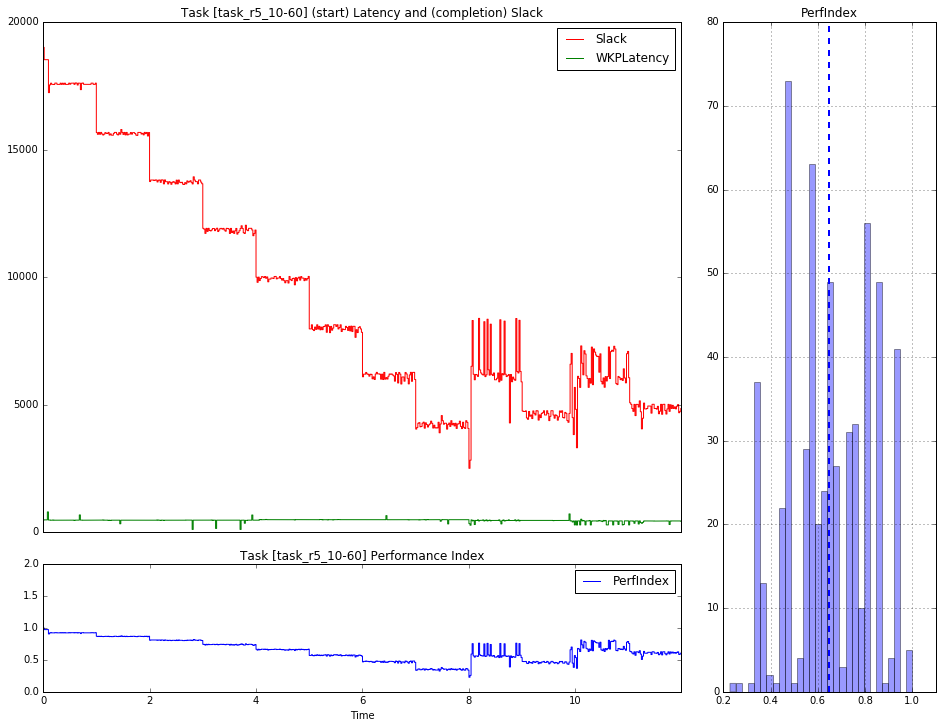

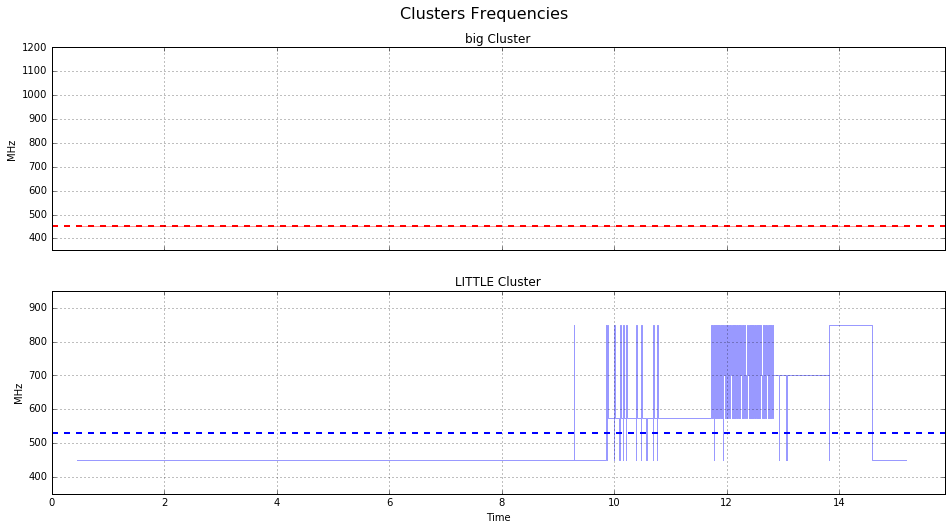

In [5]:
analysis('noboost')

## Boost 15%

02:06:34  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
02:06:35  INFO    :   task    task_r5_10-60 found, pid: [1928]
02:06:35  INFO    : Collected events spans a 15.853 [s] time interval
02:06:35  INFO    : Set plots time range to (0.000000, 15.853127)[s]
02:06:35  INFO    : Set plots time range to (0.000000, 15.853127)[s]
02:06:35  INFO    :   task    task_r5_10-60 found, pid: [1928]
02:06:36  INFO    : PerfIndex, Task [task_r5_10-60] avg: 0.87, std: 0.05
02:06:36  INFO    : LITTLE cluster average frequency: 0.620 GHz
02:06:36  INFO    : big    cluster average frequency: 0.450 GHz


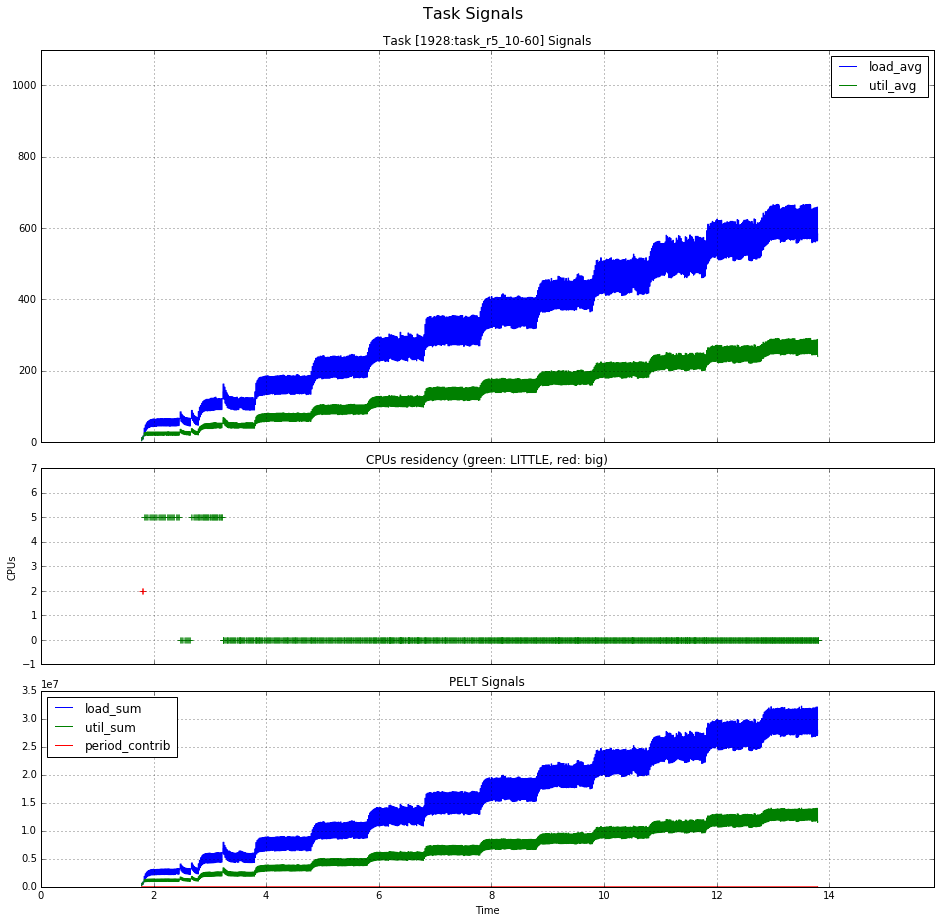

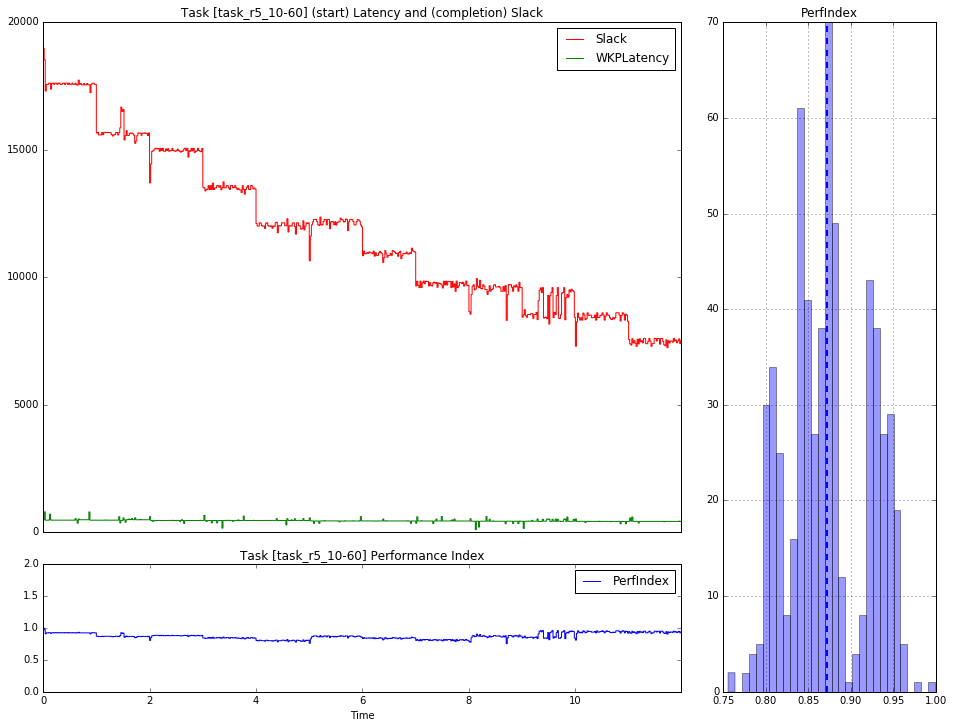

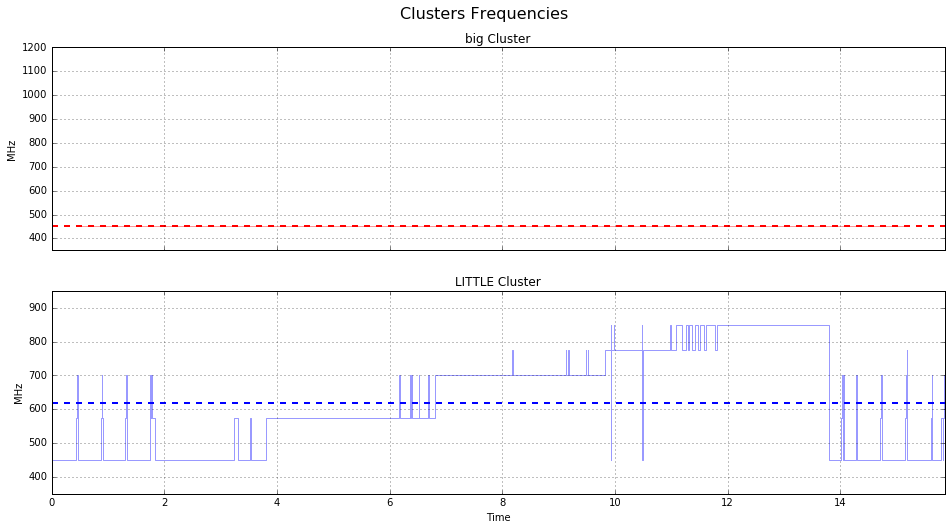

In [6]:
analysis('boost15')

## Boost 30%

02:06:37  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
02:06:37  INFO    :   task    task_r5_10-60 found, pid: [1983]
02:06:37  INFO    : Collected events spans a 15.762 [s] time interval
02:06:37  INFO    : Set plots time range to (0.000000, 15.761705)[s]
02:06:37  INFO    : Set plots time range to (0.000000, 15.761705)[s]
02:06:37  INFO    :   task    task_r5_10-60 found, pid: [1983]
02:06:38  INFO    : PerfIndex, Task [task_r5_10-60] avg: 0.96, std: 0.02
02:06:38  INFO    : LITTLE cluster average frequency: 0.827 GHz
02:06:38  INFO    : big    cluster average frequency: 0.450 GHz


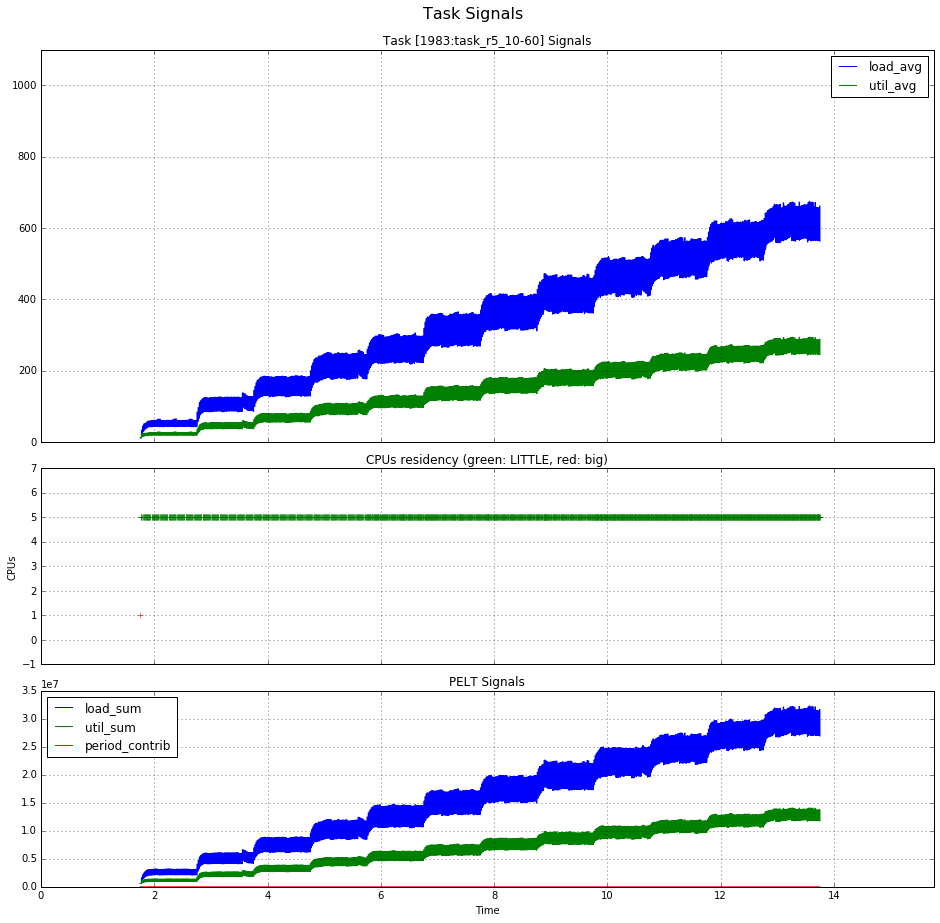

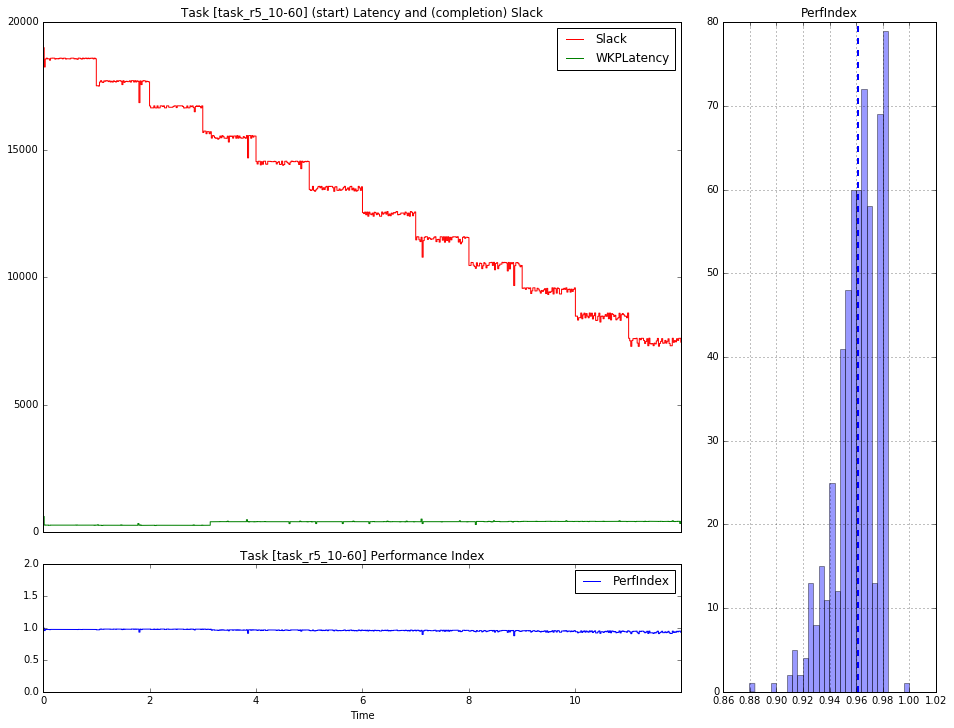

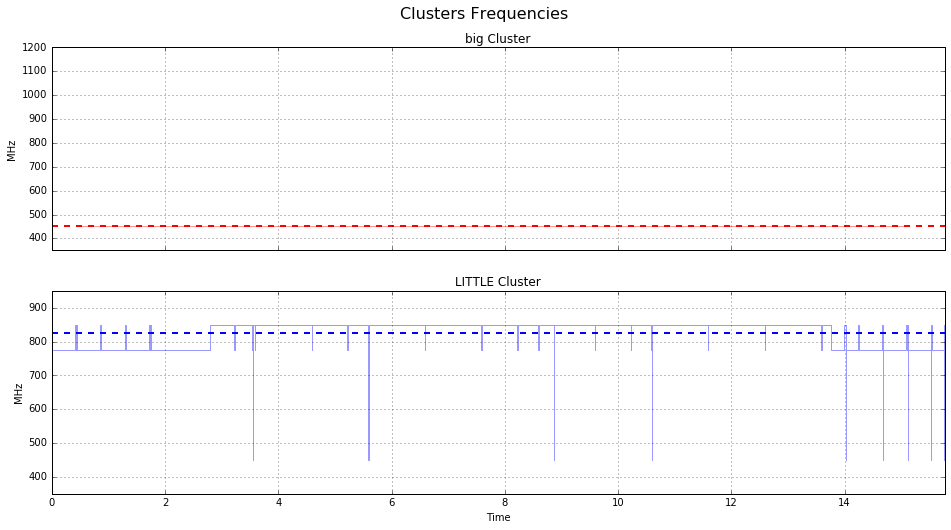

In [7]:
analysis('boost30')